<a href="https://colab.research.google.com/github/skywalker0803r/ruby_research/blob/main/crypto/SOPR%E4%B8%89%E9%87%8D%E5%9D%87%E7%B7%9A%E7%AD%96%E7%95%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [10]:
!pip install finlab_crypto > log.txt
!pip install talib-binary > log.txt

import finlab_crypto
finlab_crypto.setup()

ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '1d')

All caught up..!


# Get SOPR

In [11]:
from finlab_crypto.crawler import GlassnodeClient
from datetime import timezone
import datetime


def get_glassnode(url, api_key, index):

    gn = GlassnodeClient()
    gn.api_key = api_key
    ret = gn.get(url)
    ret.index = ret.index + datetime.timedelta(days=1)
    ret.index = ret.index.tz_localize(timezone.utc)
    ret = ret.reindex(index, method='ffill').ffill()
    return ret.astype(float)

sopr = get_glassnode('https://api.glassnode.com/v1/metrics/indicators/sopr', 
                     'c5846d6e-b7ed-4d84-9339-03e88e6db3af', index=ohlcv.index)

# Plot Chart

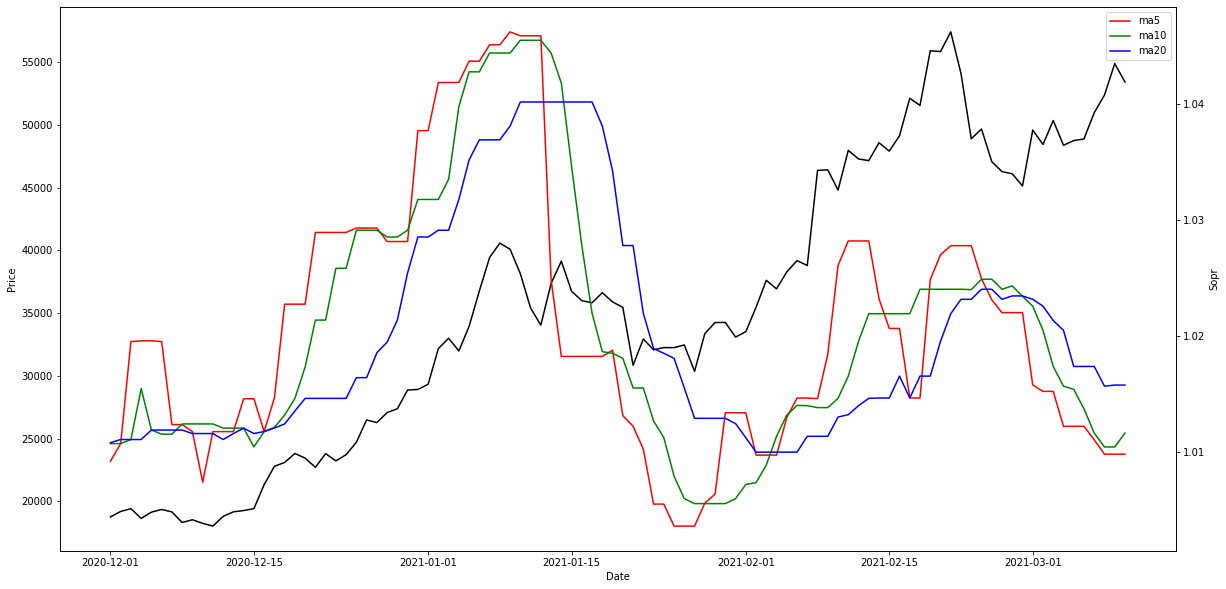

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# compute data
n = 100
idx = ohlcv.index.tolist()[-n:]
close = ohlcv['close'].values[-n:]
ma5 = sopr.rolling(5).median().values[-n:]
ma10 = sopr.rolling(10).median().values[-n:]
ma20 = sopr.rolling(20).median().values[-n:]

# plot data
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
ax1.plot(idx,close,'k-',label='Price')
ax2.plot(idx,ma5,'r-',label='ma5')
ax2.plot(idx,ma10,'g-',label='ma10')
ax2.plot(idx,ma20,'b-',label='ma20')

ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('Sopr')

plt.legend()
plt.show()